In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers for grains: Wheat (ZW=F), Corn (ZC=F), Rough Rice (ZR=F)
tickers = {
    'Wheat': 'ZW=F',
    'Corn': 'ZC=F',
    'Rice': 'ZR=F'
}

# Download 6 months of daily data
data = {}
for name, ticker in tickers.items():
    df = yf.download(ticker, period='6mo', interval='1d')[['Close']]
    df.rename(columns={'Close': name}, inplace=True)
    data[name] = df

# Merge dataframes on date
grain_df = pd.concat(data.values(), axis=1).dropna()

# Assign weights to each commodity
weights = {'Wheat': 0.4, 'Corn': 0.35, 'Rice': 0.25}

# Compute the Grain Index
grain_df['Grain_Index'] = sum(grain_df[crop] * weight for crop, weight in weights.items())

# Plot the Grain Index
plt.figure(figsize=(12, 6))
plt.plot(grain_df.index, grain_df['Grain_Index'], label='Grain Index', color='orange')
plt.title('Grain Price Index (6-Month Weighted Composite)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Index Value (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate percentage change over the period
change_pct = (grain_df['Grain_Index'].iloc[-1] - grain_df['Grain_Index'].iloc[0]) / grain_df['Grain_Index'].iloc[0] * 100
change_pct = round(change_pct, 2)

grain_df.tail(), change_pct


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Grain_Index

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download price data (6 months)
wheat = yf.download('KE=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Wheat'})
corn = yf.download('ZC=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Corn'})
rice = yf.download('ZR=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Rice'})

# Merge the data
df = pd.concat([wheat, corn, rice], axis=1).dropna()

# Calculate weighted grain index
df['Grain_Index'] = df['Wheat'] * 0.4 + df['Corn'] * 0.35 + df['Rice'] * 0.25

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Grain_Index'], label='Grain Index', color='brown', linewidth=2)
plt.title('Custom Grain Price Index (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Index Value (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print % change
change = (df['Grain_Index'][-1] - df['Grain_Index'][0]) / df['Grain_Index'][0] * 100
print(f"Grain Index 6-month change: {change:.2f}%")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Grain_Index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


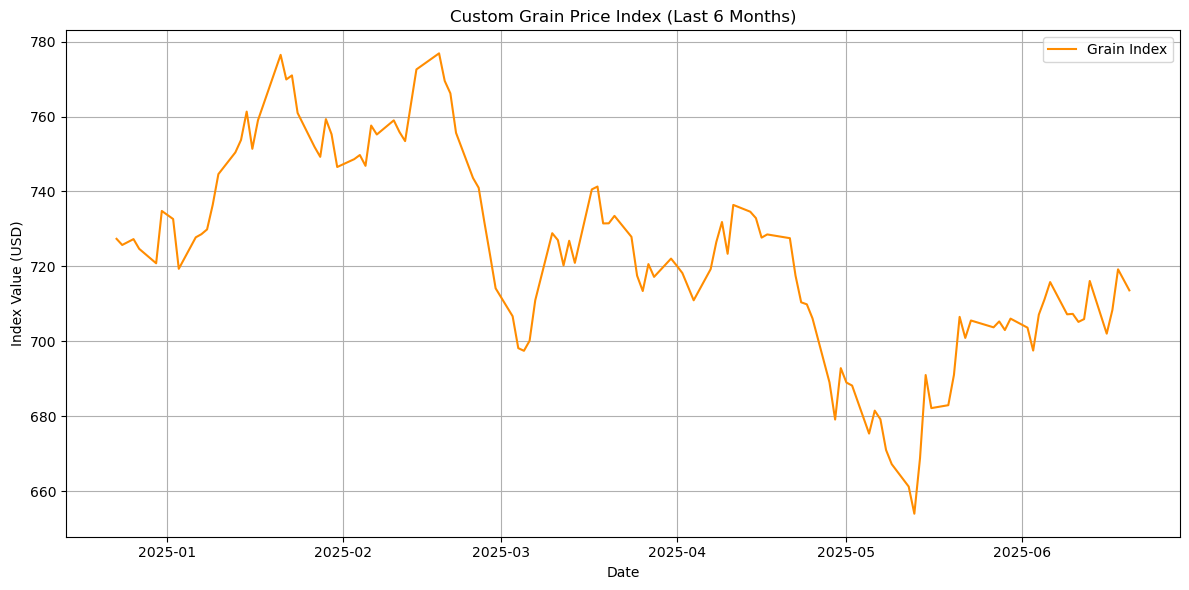

Grain Index 6-month change: -1.89%


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download price data (6 months)
wheat = yf.download('KE=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Wheat'})
corn = yf.download('ZC=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Corn'})
rice = yf.download('ZR=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Rice'})

# Merge data
df = pd.concat([wheat, corn, rice], axis=1).dropna()

# Method 1: Dot product
weights = np.array([0.4, 0.35, 0.25])
df['Grain_Index'] = df[['Wheat', 'Corn', 'Rice']].dot(weights)

# Plot the Grain Index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Grain_Index'], label='Grain Index', color='darkorange')
plt.title('Custom Grain Price Index (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Index Value (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print percentage change
change = (df['Grain_Index'].iloc[-1] - df['Grain_Index'].iloc[0]) / df['Grain_Index'].iloc[0] * 100
print(f"Grain Index 6-month change: {change:.2f}%")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

📉 Daily Volatility: 0.0110 (1.10%)
📈 Annualized Volatility: 0.1741 (17.41%)


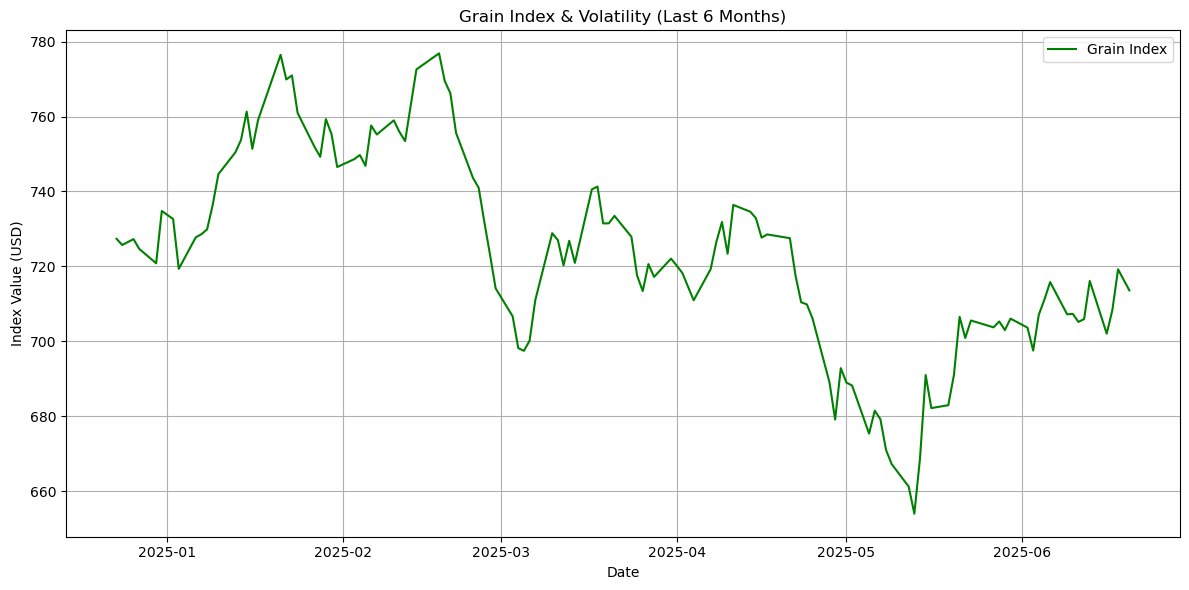

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# دریافت قیمت‌ها برای گندم، ذرت، و برنج در ۶ ماه گذشته
wheat = yf.download('KE=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Wheat'})
corn = yf.download('ZC=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Corn'})
rice = yf.download('ZR=F', period='6mo', interval='1d')[['Close']].rename(columns={'Close': 'Rice'})

# ترکیب داده‌ها
df = pd.concat([wheat, corn, rice], axis=1).dropna()

# محاسبه شاخص غلات (وزنی)
weights = np.array([0.4, 0.35, 0.25])
df['Grain_Index'] = df[['Wheat', 'Corn', 'Rice']].dot(weights)

# محاسبه بازده روزانه (Daily Returns)
df['Returns'] = df['Grain_Index'].pct_change()

# محاسبه Volatility به صورت انحراف معیار بازده‌ها × √252 (برای annualized volatility)
volatility_daily = df['Returns'].std()
volatility_annual = volatility_daily * np.sqrt(252)

# پرینت نتایج
print(f"📉 Daily Volatility: {volatility_daily:.4f} ({volatility_daily * 100:.2f}%)")
print(f"📈 Annualized Volatility: {volatility_annual:.4f} ({volatility_annual * 100:.2f}%)")

# نمودار شاخص
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Grain_Index'], label='Grain Index', color='green')
plt.title('Grain Index & Volatility (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Index Value (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
